In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)    # Data manipulate
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(ggplot2)       # Visualization
library(pROC)          # AUC, ROC
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loaded gbm 2.1.8



[1] "R version 4.0.5 (2021-03-31)"

In [2]:
# Question 3 
set.seed(1)
x = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
x

1,4
1,3
0,4
5,1
6,2
4,0


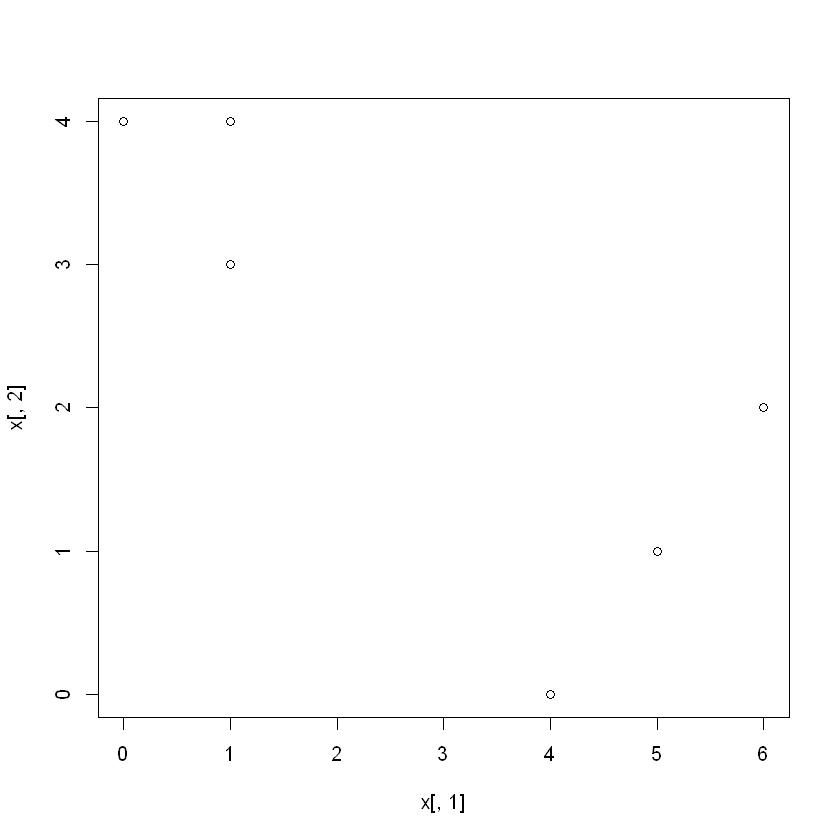

In [3]:
#3A
plot(x[,1], x[,2])

In [4]:
#3 B
labels = sample(2, nrow(x), replace=T)
labels

[1] 1 2 1 1 2 1

In [5]:
# 3 C
centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
centroid1

[1] 2.50 2.25

In [6]:
centroid2

[1] 3.5 2.5

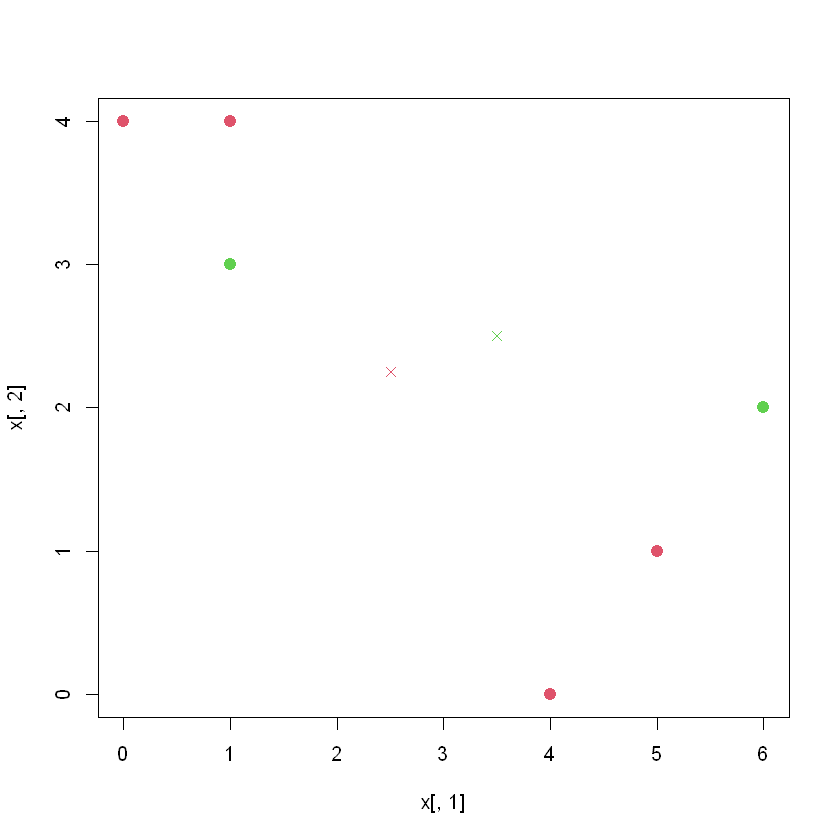

In [7]:
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [8]:
#3 d
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(x, centroid1, centroid2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclid(x[i,], centroid1) < euclid(x[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}
labels = assign_labels(x, centroid1, centroid2)
labels

[1] 1 1 1 2 2 2

In [9]:
#3 E
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
  centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
  print(centroid1)
  print(centroid2)
  labels = assign_labels(x, centroid1, centroid2)
}

[1] 0.6666667 3.6666667
[1] 5 1


In [10]:
labels

[1] 1 1 1 2 2 2

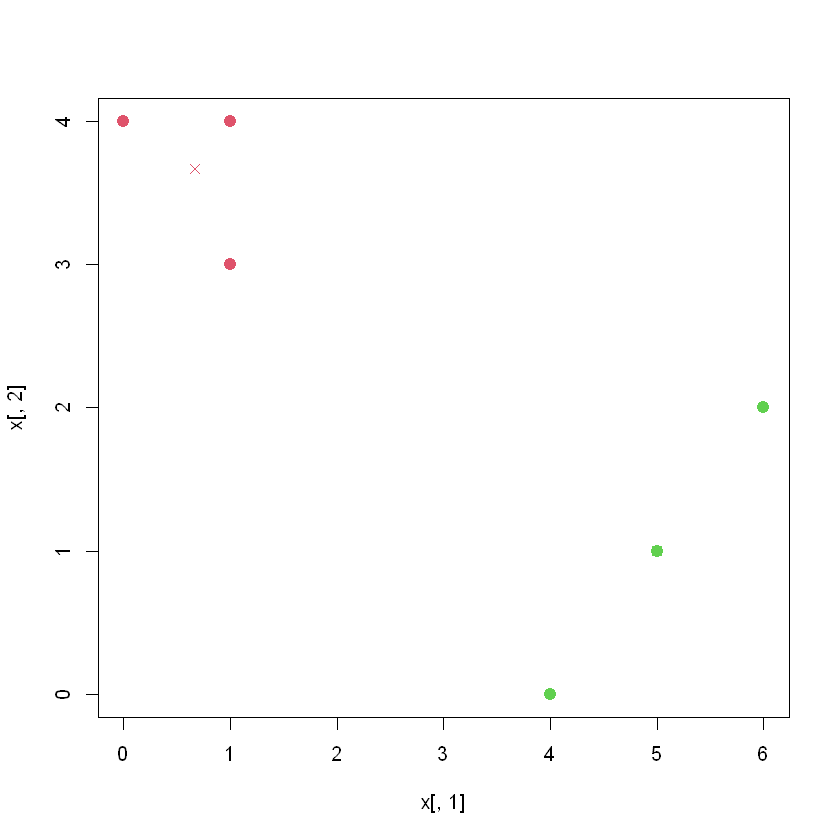

In [11]:
#3 F
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [ ]:
# Question 4 a

Not enough information to tell. The maximal intercluster dissimilarity could be equal or not equal to the minimial intercluster dissimilarity. If the dissimilarities were equal, they would fuse at the same height. If they were not equal, they single linkage dendogram would fuse at a lower height.

In [ ]:
# Question 4 b
They would fuse at the same height because linkage does not affect leaf-to-leaf fusion.

In [12]:
# Question 8 a
library(ISLR)
set.seed(1)
pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [13]:
# Question 8 b
loadings = pr.out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

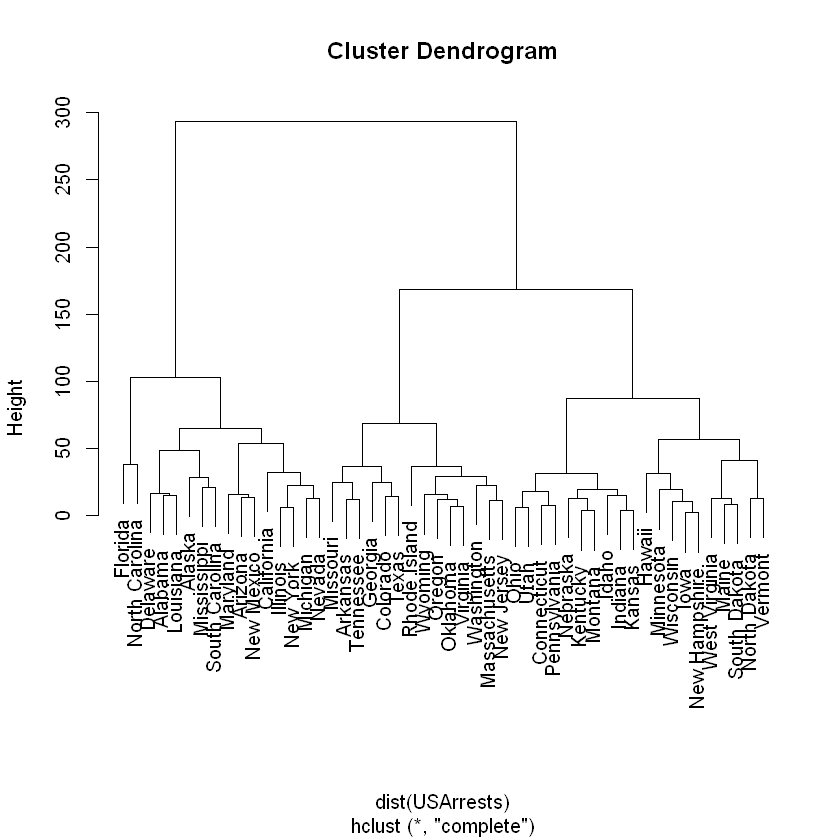

In [14]:
# Question 9 a
library(ISLR)
set.seed(2)
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete)

In [15]:
# Question 9 b
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

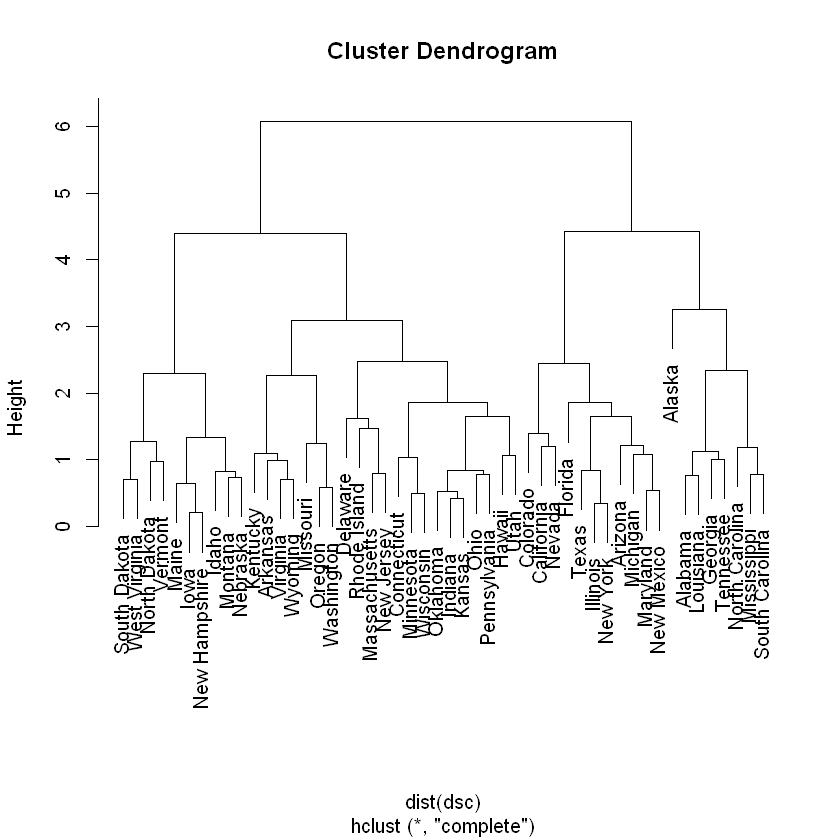

In [16]:
# Question 9 c
dsc = scale(USArrests)
hc.s.complete = hclust(dist(dsc), method="complete")
plot(hc.s.complete)

In [17]:
# Question 9 D
cutree(hc.s.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [18]:
table(cutree(hc.s.complete, 3), cutree(hc.complete, 3))

   
     1  2  3
  1  6  2  0
  2  9  2  0
  3  1 10 20

In [ ]:
Scaling the variables effects the max height of the dendogram obtained from hierarchical clustering. From a cursory glance, it doesn’t effect the bushiness of the tree obtained. However, it does affect the clusters obtained from cutting the dendogram into 3 clusters. In my opinion, for this data set the data should be standardized because the data measured has different units (UrbanPop compared to other three columns).

In [19]:
# Question 10 A
set.seed(2)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

In [20]:
# Question 10 B
pca.out = prcomp(x)
summary(pca.out)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5821 0.001731 0.001673 0.001648 0.001582
Proportion of Variance 0.750 0.2499 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001543 0.001497 0.001474 0.001411 0.001393 0.001335
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16    PC17     PC18
Standard deviation     0.001297 0.001257 0.001244 0.001226 0.00116 0.001118
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.00000 0.000000
Cumulative Proportion  0.999980 0.999990 0.999990 0.999990 0.99999 0.999990
                           PC19     PC20     PC21      PC22      PC23     

In [21]:
# Question C
km.out = kmeans(x, 3, nstart=20)
table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [22]:
# Question D
km.out = kmeans(x, 2, nstart=20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1